HOUSE PRICE PREDICTION PROJECT

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as plt

In [2]:
df = pd.read_csv('housing_price_dataset.csv')

df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
df.shape

(50000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [6]:
# prices that are negative or zero
df[df['Price'] <= 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1266,1024,2,2,Urban,2006,-24715.242482
2310,1036,4,1,Suburb,1983,-7550.504574
3630,1235,3,2,Rural,2012,-19871.251146
4162,1352,5,2,Suburb,1977,-10608.359522
5118,1140,4,1,Urban,2020,-23911.003119
5951,1097,4,3,Rural,1981,-4537.418615
6355,1016,5,2,Rural,1997,-13803.684059
8720,1235,3,1,Urban,1952,-24183.000515
9611,1131,3,3,Urban,1959,-13692.026068
10597,1177,2,3,Urban,2010,-434.097124


(49941, 6)


<Axes: xlabel='Bedrooms', ylabel='Price'>

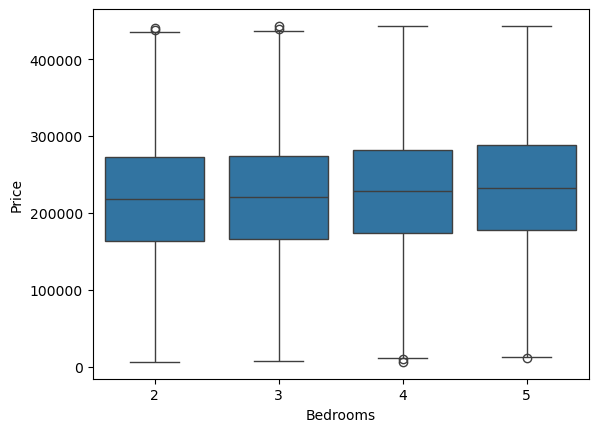

In [7]:
# Handling outliers in the 'Price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filtering out the outliers
df = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
# Checking the shape of the filtered DataFrame
print(df.shape)
# Visualizing the filtered data
sns.boxplot(x='Bedrooms', y='Price', data=df)

In [8]:
# checking for negative prices again
df[df['Price'] <= 0]

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price


In [9]:
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,49941.000000,49941.000000,49941.000000,49941.000000,49941.000000
mean,2006.363309,3.498628,1.995495,1985.406159,224822.916361
std,575.052125,1.116243,0.815842,20.720412,75762.867779
min,1000.000000,2.000000,1.000000,1950.000000,6124.032174
25%,1513.000000,3.000000,1.000000,1967.000000,170000.830619
50%,2007.000000,3.000000,2.000000,1985.000000,225051.077588
75%,2505.000000,4.000000,3.000000,2003.000000,279320.164453
max,2999.000000,5.000000,3.000000,2021.000000,443335.494338


In [10]:
# count of bedrooms and bathrooms
print(df['Bedrooms'].value_counts())
print("\n")
print(df['Bathrooms'].value_counts())

Bedrooms
3    12646
5    12449
4    12425
2    12421
Name: count, dtype: int64


Bathrooms
1    16733
2    16700
3    16508
Name: count, dtype: int64


EDA

<Axes: xlabel='Price', ylabel='Count'>

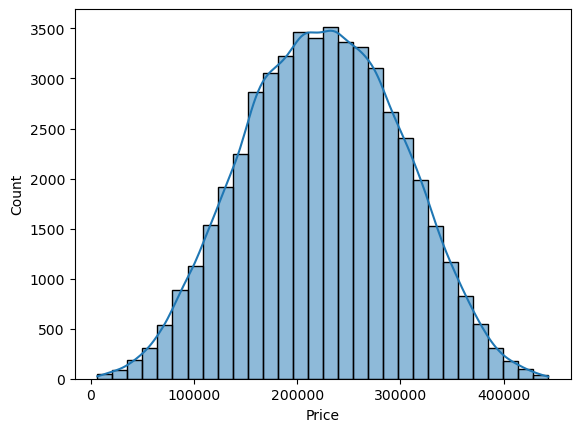

In [11]:
# distribution of prices
sns.histplot(df['Price'], bins=30, kde=True)

<Axes: xlabel='SquareFeet', ylabel='Count'>

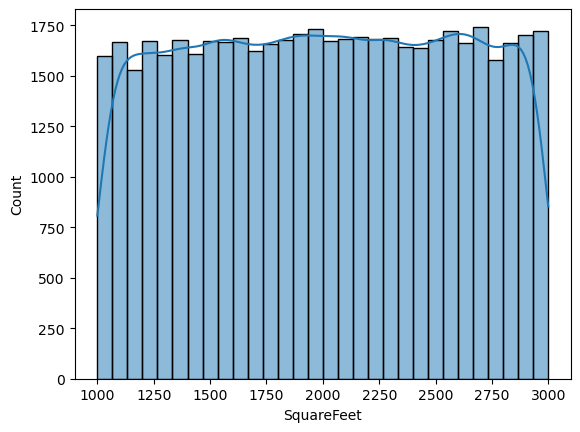

In [12]:
# distribution of SquareFeet
sns.histplot(df['SquareFeet'], bins=30, kde=True)

<Axes: xlabel='Bedrooms', ylabel='Price'>

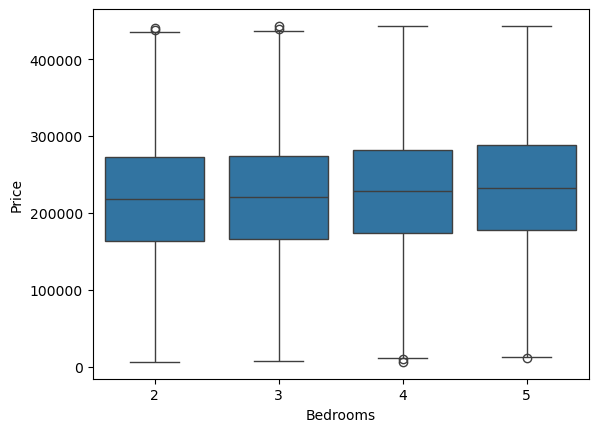

In [13]:
# house prices by number of bedrooms
sns.boxplot(x='Bedrooms', y='Price', data=df)

<Axes: xlabel='SquareFeet', ylabel='Price'>

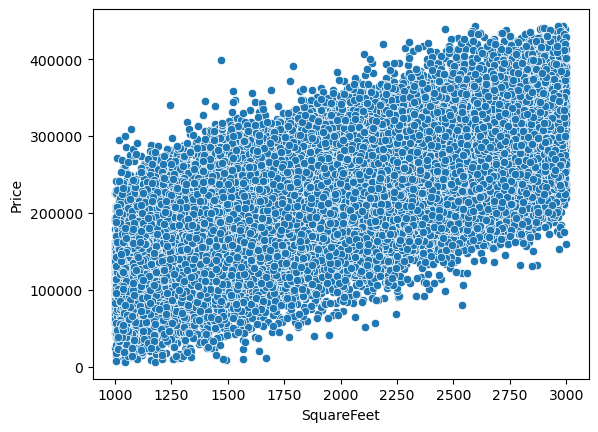

In [14]:
sns.scatterplot(x='SquareFeet', y='Price', data=df)

<Axes: xlabel='Neighborhood', ylabel='Price'>

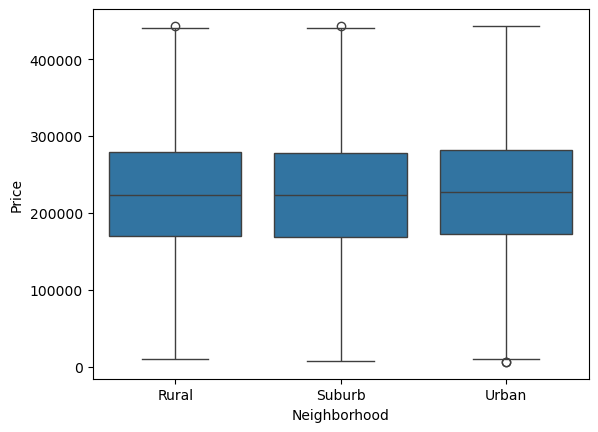

In [15]:
# distribution of house prices per neighborhood
sns.boxplot(x='Neighborhood', y='Price', data=df)

<Axes: >

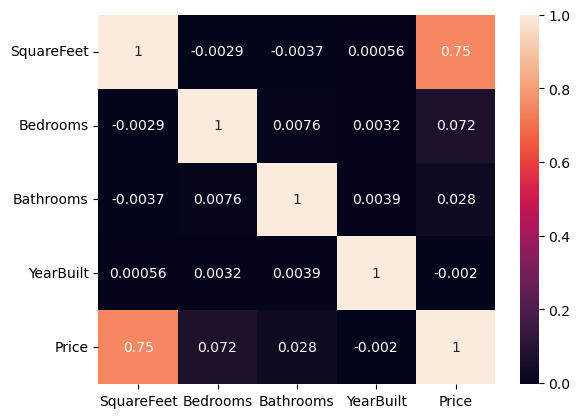

In [16]:
# correlation matrix
# selecting numerical columns for correlation
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# calculating correlation matrix
correlation_matrix = df[numerical_cols].corr()
# plotting the correlation matrix
sns.heatmap(correlation_matrix, annot=True)

FEATURE SELECTION  

In [17]:
# importing the necessary libraries for linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:
X = df.drop(columns=['Price'])
y = df['Price']

In [ ]:
# use one hot encoding for categorical variables
X = pd.get_dummies(X, columns=['Neighborhood'], drop_first=True)


X.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Neighborhood_Suburb,Neighborhood_Urban
0,2126,4,1,1969,False,False
1,2459,3,2,1980,False,False
2,1860,2,1,1970,True,False
3,2294,2,1,1996,False,True
4,2130,5,2,2001,True,False


In [20]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [21]:
# making predictions
y_pred = model.predict(X_test)


In [22]:
# evaluating the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2470274850.4194503
R-squared: 0.5665232836838479


RIDGE REGRESSION

In [23]:
# STANDARDIZING THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# TRAINING THE MODEL WITH RIDGE REGRESSION
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
# making predictions with the ridge model
y_pred_ridge = ridge_model.predict(X_test_scaled)
# evaluating the ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge):", mse_ridge)
print("R-squared (Ridge):", r2_ridge)


Mean Squared Error (Ridge): 2470274738.095343
R-squared (Ridge): 0.5665233033941586


In [26]:
# training the scaled data with random forest regression
from sklearn.ensemble import RandomForestRegressor
# Creating and training the random forest regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_scaled, y_train)
# making predictions with the random forest model
y_pred_forest = random_forest_model.predict(X_test_scaled)
# evaluating the random forest model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Mean Squared Error (Random Forest):", mse_forest)
print("R-squared (Random Forest):", r2_forest)

Mean Squared Error (Random Forest): 2773268725.475746
R-squared (Random Forest): 0.5133547911167118


In [27]:
# training the scaled data xgboost regression
from xgboost import XGBRegressor
# Creating and training the XGBoost regressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
# making predictions with the XGBoost model
y_pred_xgb = xgb_model.predict(X_test_scaled)
# evaluating the XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("Mean Squared Error (XGBoost):", mse_xgb)
print("R-squared (XGBoost):", r2_xgb)

Mean Squared Error (XGBoost): 2580680988.0228977
R-squared (XGBoost): 0.5471495326288325


In [28]:
# combining models for to improve predictions (stacking)
from sklearn.ensemble import StackingRegressor
# Defining the base models
estimators = [
    ('ridge', Ridge(alpha=1.0)),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('xgb', XGBRegressor(random_state=42))
]
# Creating and training the stacking regressor
stacking_model = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacking_model.fit(X_train_scaled, y_train)
# making predictions with the stacking model
y_pred_stacking = stacking_model.predict(X_test_scaled)
# evaluating the stacking model
mse_stacking = mean_squared_error(y_test, y_pred_stacking)
r2_stacking = r2_score(y_test, y_pred_stacking)
print("Mean Squared Error (Stacking):", mse_stacking)
print("R-squared (Stacking):", r2_stacking)


Mean Squared Error (Stacking): 2470558897.9635468
R-squared (Stacking): 0.5664734398388718
